In [1]:
import pandas as pd
import sqlite3
import taxis
import matplotlib.pyplot as plt
from utils import *

In [17]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [6]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [7]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [8]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


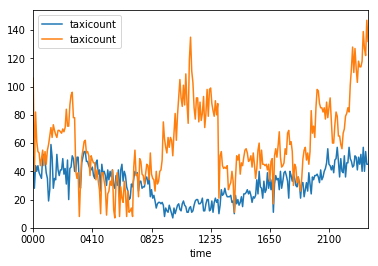

In [18]:
ax=df.query('x==20 and y==12').plot(y='taxicount',x='time')
df.query('x==20 and y==5').plot(ax=ax,y='taxicount',x='time')
plt.show()
